# TensorFlow classification real dataset example

In [42]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [43]:
data = pd.read_csv("pima-indians-diabetes.csv")

In [44]:
data.describe()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,33.240885,0.348958
std,3.369578,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,24.000000,0.000000
50%,3.000000,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,29.000000,0.000000
75%,6.000000,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,41.000000,1.000000
max,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,81.000000,1.000000


In [45]:
data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [46]:
data.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [47]:
norm_to_cols = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [48]:
data[norm_to_cols] = data[norm_to_cols].apply(lambda x: (x-x.min())/(x.max()-x.min()))

In [49]:
data.describe()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,33.240885,0.348958
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,24.000000,0.000000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,29.000000,0.000000
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,41.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,81.000000,1.000000


In [50]:
num_preg = tf.feature_column.numeric_column("Number_pregnant")
plasma_gluc = tf.feature_column.numeric_column("Glucose_concentration")
dias_press = tf.feature_column.numeric_column("Blood_pressure")
tricep = tf.feature_column.numeric_column("Triceps")
insulin = tf.feature_column.numeric_column("Insulin")
bmi = tf.feature_column.numeric_column("BMI")
diabetes_pedigree = tf.feature_column.numeric_column("Pedigree")
age = tf.feature_column.numeric_column("Age")

In [51]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',["A", "B", "C", "D"])

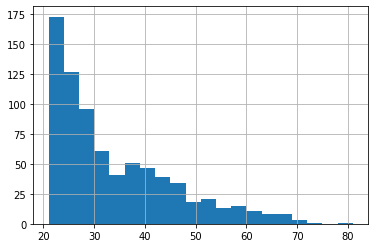

In [52]:
data["Age"].hist(bins=20)

In [53]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20, 30, 40, 50, 60, 70, 80])

# Putting them together

In [54]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, assigned_group, age_buckets]

# Train test split

In [55]:
data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [56]:
x_data = data.drop('Class',axis=1)
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [57]:
labels = data['Class']
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [58]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

### input function

In [59]:
input_fnc = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size=10, num_epochs=1000, shuffle=True)

## Creating model

In [60]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp124imcm8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f4a6de65748>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [61]:
model.train(input_fn=input_fnc, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp124imcm8/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 31.8234
INFO:tensorflow:loss = 5.385252, step = 101 (3.149 sec)
INFO:tensorflow:global_step/sec: 159.46
INFO:tensorflow:loss = 7.4381523, step = 201 (0.626 sec)
INFO:tensorflow:global_step/sec: 126.094
INFO:tensorflow:loss = 6.662781, step = 301 (0.793 sec)
INFO:tensorflow:global_step/sec: 86.2129
INFO:tensorflow:loss = 6.454464, step = 401 (1.164 sec)
INFO:tensorflow:global_step/sec: 97.7182
INFO:tensorflow:loss = 4.667251, step = 501 (1.037 sec)
INFO:tensorflow:global_step/sec: 94.0519
INFO:tensorflow:loss = 6.6636863, step = 601 (1.046 sec)
INFO:tensorflow:global_step/sec: 124.649
INFO:tensorflow:loss =

# Evaluation

In [62]:
eval_input_fnc = tf.estimator.inputs.pandas_input_fn(
                                                        X_test, y_test,
                                                        num_epochs=1,
                                                        batch_size=10,
                                                        shuffle=False
                                                    )

In [63]:
res = model.evaluate(eval_input_fnc)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-09-02T15:21:35Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp124imcm8/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-09-02-15:21:43
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74458873, accuracy_baseline = 0.64935064, auc = 0.7979013, auc_precision_recall = 0.634338, average_loss = 0.5297187, global_step = 1000, label/mean = 0.35064936, loss = 5.098542, precision = 0.6666667, prediction/mean = 0.3684302, recall = 0.54320985
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmp124imcm8/model.ckpt-1000


In [64]:
res

{'accuracy': 0.74458873,
 'accuracy_baseline': 0.64935064,
 'auc': 0.7979013,
 'auc_precision_recall': 0.634338,
 'average_loss': 0.5297187,
 'label/mean': 0.35064936,
 'loss': 5.098542,
 'precision': 0.6666667,
 'prediction/mean': 0.3684302,
 'recall': 0.54320985,
 'global_step': 1000}

# Prediction

In [65]:
pred_input_fn = tf.estimator.inputs.pandas_input_fn(X_test, batch_size=10, num_epochs=1, shuffle=False)

In [66]:
prediction = model.predict(pred_input_fn)

In [67]:
list(prediction)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp124imcm8/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([0.15451771], dtype=float32),
  'logistic': array([0.53855276], dtype=float32),
  'probabilities': array([0.46144727, 0.53855276], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([0.48304147], dtype=float32),
  'logistic': array([0.6184658], dtype=float32),
  'probabilities': array([0.3815342, 0.6184658], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.5341746], dtype=float32),
  'logistic': array([0.3695438], dtype=float32),
  'probabilities': array([0.63045627, 0.3695438 ], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.6036786], dtype=float32),
  'logistic': array([0.35350257], dtype=float32),
  'probabilities': array([0.6464974 , 0.35350254], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.6422812], dtype=float32),
  'logistic': ar

# DNN Classifier 

In [71]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [72]:
feat_cols = feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, embedded_group_col, age_buckets]

In [73]:
input_fnc = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [74]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp89gbgoo_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f4a6e288c88>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [75]:
dnn_model.train(input_fnc, steps=1000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp89gbgoo_/model.ckpt.
INFO:tensorflow:loss = 7.149885, step = 1
INFO:tensorflow:global_step/sec: 34.3762
INFO:tensorflow:loss = 4.7423444, step = 101 (2.912 sec)
INFO:tensorflow:global_step/sec: 126.787
INFO:tensorflow:loss = 6.1659975, step = 201 (0.788 sec)
INFO:tensorflow:global_step/sec: 125.462
INFO:tensorflow:loss = 4.808563, step = 301 (0.799 sec)
INFO:tensorflow:global_step/sec: 122.873
INFO:tensorflow:loss = 8.62785, step = 401 (0.817 sec)
INFO:tensorflow:global_step/sec: 125.597
INFO:tensorflow:loss = 4.233901, step = 501 

In [76]:
eval_input_fnc = tf.estimator.inputs.pandas_input_fn(X_test, y_test, num_epochs=1, batch_size=10, shuffle=False)

In [81]:
prediction = dnn_model.predict(eval_input_fnc)

In [82]:
list(prediction)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp89gbgoo_/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([-0.2951752], dtype=float32),
  'logistic': array([0.42673737], dtype=float32),
  'probabilities': array([0.57326263, 0.42673737], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([0.75637555], dtype=float32),
  'logistic': array([0.6805663], dtype=float32),
  'probabilities': array([0.3194337, 0.6805663], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.6956569], dtype=float32),
  'logistic': array([0.33277586], dtype=float32),
  'probabilities': array([0.6672241 , 0.33277583], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.24802893], dtype=float32),
  'logistic': array([0.43830872], dtype=float32),
  'probabilities': array([0.5616913 , 0.43830872], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-2.6679602], dtype=float32),
  'logistic': 

In [83]:
res = dnn_model.evaluate(eval_input_fnc)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-09-02T15:40:37Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp89gbgoo_/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-09-02-15:40:43
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74458873, accuracy_baseline = 0.64935064, auc = 0.83436215, auc_precision_recall = 0.700281, average_loss = 0.4734115, global_step = 1000, label/mean = 0.35064936, loss = 4.556586, precision = 0.671875, prediction/mean = 0.34134564, recall = 0.5308642
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmp89gbgoo_/model.ckpt-1000


In [85]:
result

{'accuracy': 0.74458873,
 'accuracy_baseline': 0.64935064,
 'auc': 0.83436215,
 'auc_precision_recall': 0.700281,
 'average_loss': 0.4734115,
 'label/mean': 0.35064936,
 'loss': 4.556586,
 'precision': 0.671875,
 'prediction/mean': 0.34134564,
 'recall': 0.5308642,
 'global_step': 1000}